In [1]:
import schemdraw.logic
import schemdraw.elements as elm
import matplotlib.pyplot as plt
import numpy as np

from schemdraw.logic.kmap import Kmap

# Sequential circuit

Suppose that we wish to implement a light switch with button.
We desire that pressing the switch would turn on the light if it is currently off, but turn it off if it is currently on.
With what we've learnt so far, we are unable to implement this system, because we need a mechanism to keep track of the light state.
In other words, our system requires some form of memory.

In sequential logic circuits, the output depends on both the current input and the previous state.

Sequential circuits can be:
* Synchronous
    * needs a clock input
    * responds to inputs at discrete time instants as per clock 
* Asynchronous
    * unclocked
    * responds to input whenever input changes

## Flip-flop/latch

### SR flip-flop/Latch

The simplest memory component is the **Set-Reset (SR) flip-flop/latch**.
It is able to store 1 bit of information, in its $Q$ output.

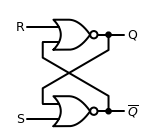

In [2]:
with schemdraw.Drawing() as d:
    d += (g1 := schemdraw.logic.Nor())
    d.move_from(g1.in1, dy=-2.5)
    d += (g2 := schemdraw.logic.Nor().anchor("in1"))
    d += (g1out := schemdraw.logic.Line().right(0.25).at(g1.out))
    d += schemdraw.logic.Wire("N", k=0.5).at(g2.in1).to(g1out.end).dot()
    d += (g2out := schemdraw.logic.Line().right(0.25).at(g2.out))
    d += schemdraw.logic.Wire("N", k=0.5).at(g1.in2).to(g2out.end).dot()
    d += schemdraw.logic.Line().at(g1.in1).left(0.5).label("R", "left")
    d += schemdraw.logic.Line().at(g2.in2).left(0.5).label("S", "left")
    d += schemdraw.logic.Line().at(g1.out).right(0.75).label("Q", "right")
    d += schemdraw.logic.Line().at(g2.out).right(0.75).label("$\overline{Q}$", "right")

Suppose that $R$ and $S$ are both 0, then the NOR gate becomes simply an inverter.

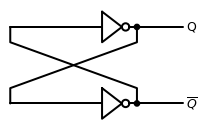

In [3]:
with schemdraw.Drawing() as d:
    d += (g1 := schemdraw.logic.Not())
    d.move_from(g1.in1, dy=-2.5)
    d += (g2 := schemdraw.logic.Not().anchor("in1"))
    d += (g1in := schemdraw.logic.Line().left(0).at(g1.in1))
    d += (g2in := schemdraw.logic.Line().left(0).at(g2.in1))
    d += (g1out := schemdraw.logic.Line().right(0.25).at(g1.out))
    d += (g2out := schemdraw.logic.Line().right(0.25).at(g2.out))
    d += schemdraw.logic.Wire("N", k=0.5).at(g2in.end).to(g1out.end).dot()
    d += schemdraw.logic.Wire("N", k=0.5).at(g1in.end).to(g2out.end).dot()
    d += schemdraw.logic.Line().at(g1.out).right(1.75).label("Q", "right")
    d += schemdraw.logic.Line().at(g2.out).right(1.75).label("$\overline{Q}$", "right")

Simplifying the above, we get:

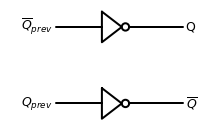

In [4]:
with schemdraw.Drawing() as d:
    d += (g1 := schemdraw.logic.Not())
    d.move_from(g1.in1, dy=-2.5)
    d += (g2 := schemdraw.logic.Not().anchor("in1"))
    d += (g1in := schemdraw.logic.Line().left(0.25).at(g1.in1))
    d += (g2in := schemdraw.logic.Line().left(0.25).at(g2.in1))
    d += (g1out := schemdraw.logic.Line().right(0.25).at(g1.out))
    d += schemdraw.logic.Line().at(g1.out).right(1.75).label("Q", "right")
    d += (
        schemdraw.logic.Line()
        .at(g1.in1)
        .left(1.5)
        .label("$\overline{Q}_{prev}$", "left")
    )
    d += schemdraw.logic.Line().at(g2.out).right(1.75).label("$\overline{Q}$", "right")
    d += schemdraw.logic.Line().at(g2.in1).left(1.5).label("$Q_{prev}$", "left")

which is simply maintaining that both lines are complements of each other.

Hence, $S=0, R=0$ is **holding** the signal.

Now suppose that $R=1, S=0$.

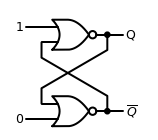

In [5]:
with schemdraw.Drawing() as d:
    d += (g1 := schemdraw.logic.Nor())
    d.move_from(g1.in1, dy=-2.5)
    d += (g2 := schemdraw.logic.Nor().anchor("in1"))
    d += (g1out := schemdraw.logic.Line().right(0.25).at(g1.out))
    d += schemdraw.logic.Wire("N", k=0.5).at(g2.in1).to(g1out.end).dot()
    d += (g2out := schemdraw.logic.Line().right(0.25).at(g2.out))
    d += schemdraw.logic.Wire("N", k=0.5).at(g1.in2).to(g2out.end).dot()
    d += schemdraw.logic.Line().at(g1.in1).left(0.5).label("1", "left")
    d += schemdraw.logic.Line().at(g2.in2).left(0.5).label("0", "left")
    d += schemdraw.logic.Line().at(g1.out).right(0.75).label("Q", "right")
    d += schemdraw.logic.Line().at(g2.out).right(0.75).label("$\overline{Q}$", "right")

Evaluating the top NOR gate gives us that $Q=0$, which allows us to evaluate the bottom NOR gate to get $\bar Q = 1$.

Hence, $R=1, S=0$ lets us reset the bit.

By symmetry, we can see that $R=0, S=1$ will set the bit instead.

Lastly, $R=1, S=1$ is deemed an invalid input, and should not be sent to the flip-flop.

The table for RS latch is as below:

| S | R | Q+ |
| --- | --- | --- |
| 0 | 0 | Q |
| 0 | 1 | 0 |
| 1 | 0 | 1 |
| 1 | 1 | Invalid |

We can abstract all the implementation away to obtain the following block:

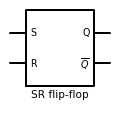

In [6]:
with schemdraw.Drawing() as d:
    d += (
        elm.Ic(
            pins=[
                elm.IcPin(name="R", side="left"),
                elm.IcPin(name="S", side="left"),
                elm.IcPin(name="$\overline{Q}$", side="right", anchorname="QBAR"),
                elm.IcPin(name="Q", side="right"),
            ],
            pinspacing=1,
        )
        .right()
        .label("SR flip-flop", "bottom", fontsize=12)
    )

#### Application

SR latch can be used for debouncing a switch.

A typical switch is implemented as below.

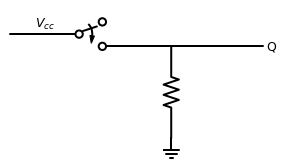

In [7]:
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d += elm.Line().right(d.unit * 0.75).label("$V_{cc}$")
    d += (S1 := elm.SwitchSpdt2(action="close").right().anchor("a"))
    d += elm.Line().right(d.unit * 0.75).at(S1.c)
    d += elm.Resistor().down()
    d += elm.Ground().right()
    d += elm.Line().at(S1.c).right(d.unit * 1.75).label("Q", "right")

Switch bouncing can cause multiple activation of our system.

Suppose we implemented our switch system as per below instead:

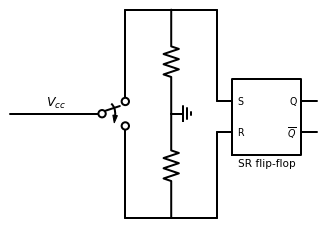

In [8]:
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    sr = (
        elm.Ic(
            pins=[
                elm.IcPin(name="R", side="left"),
                elm.IcPin(name="S", side="left"),
                elm.IcPin(name="$\overline{Q}$", side="right", anchorname="QBAR"),
                elm.IcPin(name="Q", side="right"),
            ],
            pinspacing=1,
        )
        .right()
        .label("SR flip-flop", "bottom", fontsize=12)
    )
    d += sr
    d += elm.Line().up().at(sr.S)
    d += (p1 := elm.Line().left(d.unit * 0.5))
    d += elm.Line().left(d.unit * 0.5)
    d += elm.Line().down()
    d += (S1 := elm.SwitchSpdt2(action="close").right().anchor("b"))
    d += elm.Line().left().label("$V_{cc}$").at(S1.a)
    d += elm.Line().down().at(S1.c)
    d += (p2 := elm.Line().right(d.unit * 0.5))
    d += elm.Line().right(d.unit * 0.5)
    d += elm.Line().up().to(sr.R)
    d += elm.Resistor().down().at(p1.end).toy(S1.a)
    d += elm.Ground().up()
    d += elm.Resistor().down().to(p2.end)

Now, when the switch is on, $S=1, R=0$; and when the switch is off, $S=0, R=1$.
Suppose switch bouncing occurs when we try to switch on the circuit, then the circuit will bounce between $S=1, R=0$ and $S=0, R=0$.
This means the resultant $Q$ will be held at 1, instead of jumping between 1 and 0, effectively debouncing our circuit.

### JK flip-flop/latch

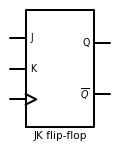

In [9]:
with schemdraw.Drawing() as d:
    d += (
        elm.Ic(
            pins=[
                elm.IcPin(name=">", side="left"),
                elm.IcPin(name="K", side="left"),
                elm.IcPin(name="J", side="left"),
                elm.IcPin(name="$\overline{Q}$", side="right", anchorname="QBAR"),
                elm.IcPin(name="Q", side="right"),
            ],
            pinspacing=1,
        )
        .right()
        .label("JK flip-flop", "bottom", fontsize=12)
    )

JK flip-flop introduces a clock input, and also utilize the input of $J=1, K=1$ as toggling $Q$.

| CLK | J | K | Q+ |
| --- | --- | --- | --- |
| $$\uparrow$$ | 0 | 0 | Q |
| $$\uparrow$$ | 0 | 1 | 0 |
| $$\uparrow$$ | 1 | 0 | 1 |
| $$\uparrow$$ | 1 | 1 | $$\overline Q$$|

The flip-flop only responds to the input only on the **active clock edge**, in this case the $\uparrow$ on $CLK$ means its the rising clock edge.

The inclusion of clock allows us to build synchronous circuits.

### D flip-flop/latch

D flip-flop have a rather simple excitation table:

| CLK | D | Q+ |
| --- | --- |  --- |
| $$\uparrow$$ | 0 | 0 |
| $$\uparrow$$ | 1 | 1 |

### Timing parameters

* $t_{setup}$: minimum time before active clock edge where input must be stable
* $t_{hold}$: minimum time after active clock edge where input must be stable
* $t_{pHL}$: time taken for output to change from high to low
* $t_{pLH}$: time taken for output to change from low to high

If input change state such that $t_{setup}$ or $t_{hold}$ are not satisfied, then the output will be unpredictable.

$t_{pHL}$ and $t_{pLH}$ are usually generalized into $t_{pd}$, which is the propagation delay.

## Counter

### Ripple counter (Asynchronous)

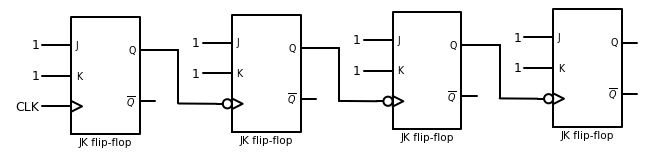

In [10]:
def jk(invert_clk=False):
    return (
        elm.Ic(
            pins=[
                elm.IcPin(name=">", side="left", invert=invert_clk),
                elm.IcPin(name="K", side="left"),
                elm.IcPin(name="J", side="left"),
                elm.IcPin(name="$\overline{Q}$", side="right", anchorname="QBAR"),
                elm.IcPin(name="Q", side="right"),
            ],
            pinspacing=1,
        )
        .right()
        .label("JK flip-flop", "bottom", fontsize=12)
    )


with schemdraw.Drawing() as d:
    ffs = []
    for i in range(4):
        ffs.append(jk(invert_clk=i > 0))
        d += ffs[-1]
        d += elm.Line().at(ffs[-1].J).left(d.unit * 0.15).label("1", "left")
        d += elm.Line().at(ffs[-1].K).left(d.unit * 0.15).label("1", "left")
        d.move_from(ffs[-1].QBAR, dx=2.5, dy=-1)

    for ff1, ff2 in zip(ffs, ffs[1:]):
        d += elm.Line().at(ff1.Q).right(d.unit * 0.25)
        d += elm.Line().down(d.unit * 0.58)
        d += elm.Line().to(ff2.CLK)

    d += elm.Line().at(ffs[0].CLK).left(d.unit * 0.15).label("CLK", "left")

Since all $J=1, K=1$, all the flip-flops will toggle their output when activated.
The leftmost flip-flop would get activated on the active edge of $CLK$.
Subsequently, $Q$ will toggle at that frequency, meaning it will be oscillating at half the frequency of $CLK$.

Since $Q$ is the input to the next flip-flop, the next flip-flop will receive a clock at half the frequency of $CLK$.
Continuing this logic, each flip-flop will toggle at half the frequency of the next.
By treating the value of each flip-flop as a bit, we obtain a $N$-bit counter which is increasing.

The left-most flip-flop will represent the least significant bit, and the right-most the most significant.

The timing diagram would be as below:

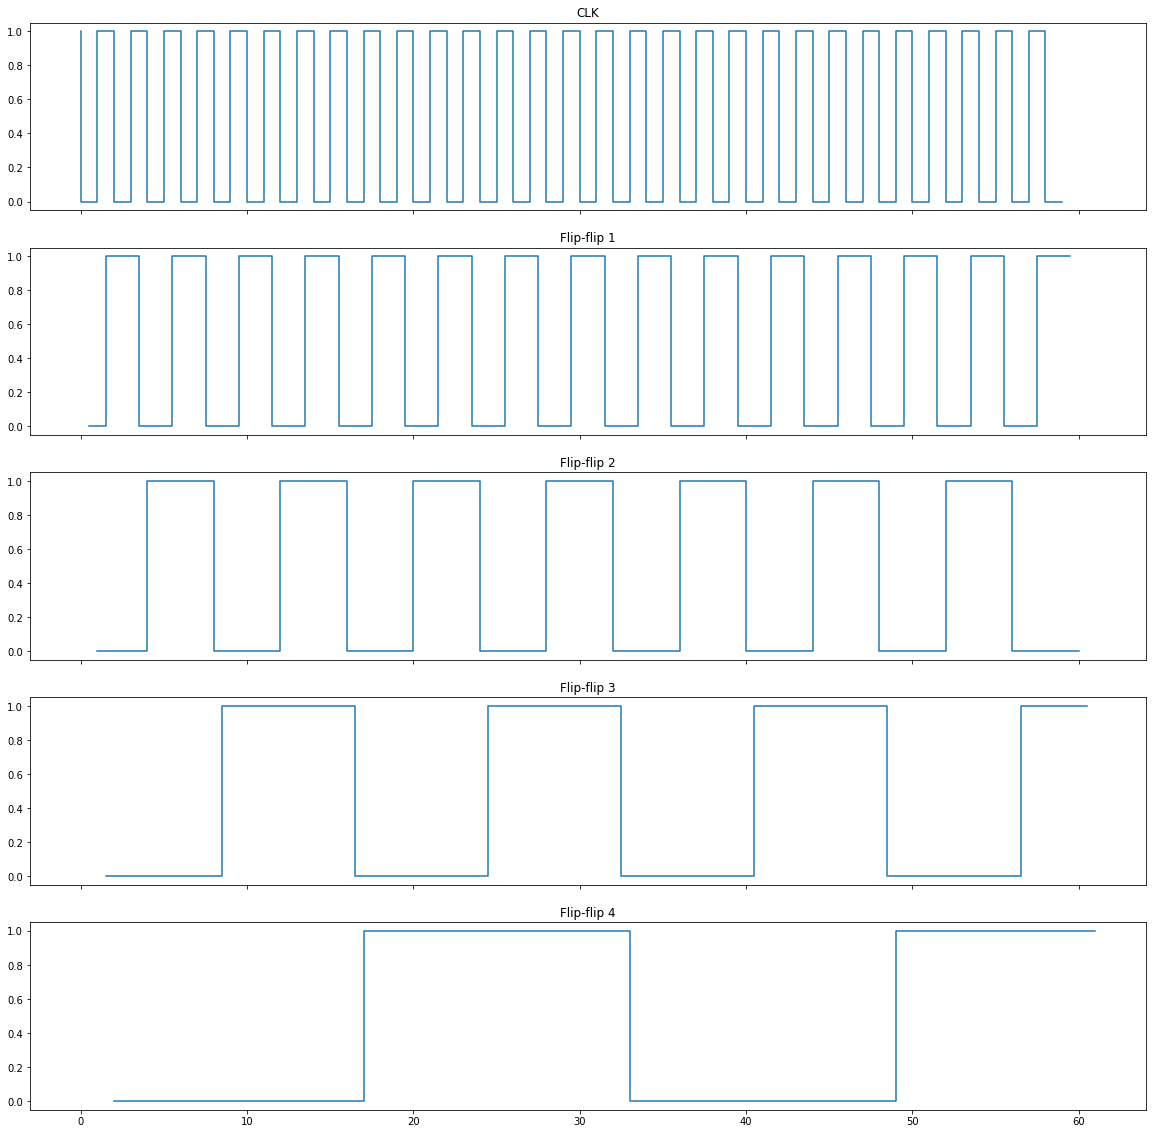

In [11]:
delay = 0.5
t = np.arange(0, 60)
_, axs = plt.subplots(5, 1, figsize=(20, 20), sharex=True, sharey=True)
axs[0].step(t, 1 - (t % 2))
axs[0].set_title("CLK")

for i in range(1, 5):
    axs[i].step(t + delay * i, np.where(t % 2 ** (i + 1) >= 2**i, 1, 0))
    axs[i].set_title(f"Flip-flip {i}")

Note that the flip-flops don't transition exactly on the active edge, due to propagation delay.

Suppose that we want a counter that counts up to $k$ instead of $2^{N-1}$.
We can hook up the **asynchronous clear** of each flip-flop to the data line which corresponds to $k$.

For example, we have a 4-bit number, but want a mod-10 counter, _ie_ we want to count from 0-9.

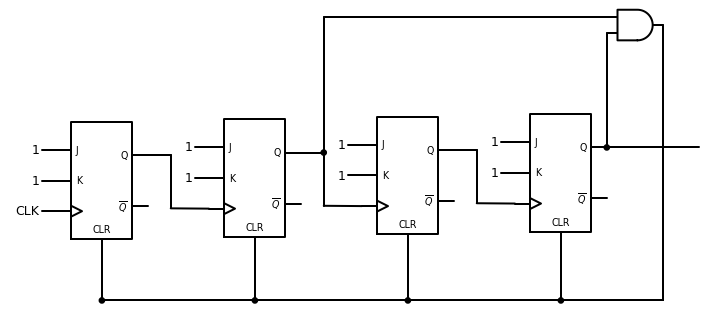

In [12]:
def jk(invert_clk=False):
    return elm.Ic(
        pins=[
            elm.IcPin(name=">", side="left", invert=invert_clk),
            elm.IcPin(name="K", side="left"),
            elm.IcPin(name="J", side="left"),
            elm.IcPin(name="$\overline{Q}$", side="right", anchorname="QBAR"),
            elm.IcPin(name="CLR", side="bottom"),
            elm.IcPin(name="Q", side="right"),
        ],
        pinspacing=1,
    ).right()


with schemdraw.Drawing() as d:
    ffs = []
    for i in range(4):
        ffs.append(jk())
        d += ffs[-1]
        d += elm.Line().at(ffs[-1].J).left(d.unit * 0.15).label("1", "left")
        d += elm.Line().at(ffs[-1].K).left(d.unit * 0.15).label("1", "left")
        d.move_from(ffs[-1].QBAR, dx=2.5, dy=-1)
    d.move_from(ffs[-1].Q)
    d += elm.Dot()
    for i, (ff1, ff2) in enumerate(zip(ffs, ffs[1:])):
        line = elm.Line().at(ff1.Q).right(d.unit * 0.25)
        if i == 1:
            bit = line
            d += line.dot()
        else:
            d += line
        d += elm.Line().down(d.unit * 0.58)
        d += elm.Line().to(ff2.CLK)
    d += (out := elm.Line().at(ffs[-1].Q).right())
    d.move_from(out.start, dx=0, dy=4)
    d += (and_gate := schemdraw.logic.And(inputs=2).right())
    d += elm.Line().at(out.start).to(and_gate.in2)

    target_in = and_gate.in1
    d += elm.Line().at(bit.end).up().toy(target_in)
    d += elm.Line().to(target_in)

    d += (clr := elm.Line().at(and_gate.out).down(d.unit * 3))
    for ff in ffs:
        d += elm.Line().at(clr.end).tox(ff.CLR).dot()
        d += elm.Line().to(ff.CLR)

    d += elm.Line().at(ffs[0].CLK).left(d.unit * 0.15).label("CLK", "left")

Thus, when the AND gate reads the bit equivalent of 10, it will activate the $CLR$ of all the flip-flop, resetting us to 0.

To create a counter which counts down, we simply join the output complement of each flip-flop into the clock of the next, as per below:

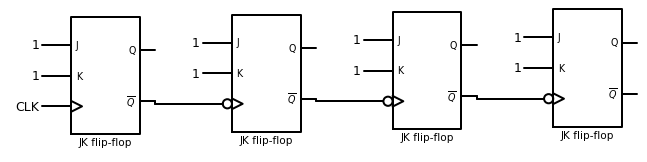

In [13]:
def jk(invert_clk=False):
    return (
        elm.Ic(
            pins=[
                elm.IcPin(name=">", side="left", invert=invert_clk),
                elm.IcPin(name="K", side="left"),
                elm.IcPin(name="J", side="left"),
                elm.IcPin(name="$\overline{Q}$", side="right", anchorname="QBAR"),
                elm.IcPin(name="Q", side="right"),
            ],
            pinspacing=1,
        )
        .right()
        .label("JK flip-flop", "bottom", fontsize=12)
    )


with schemdraw.Drawing() as d:
    ffs = []
    for i in range(4):
        ffs.append(jk(invert_clk=i > 0))
        d += ffs[-1]
        d += elm.Line().at(ffs[-1].J).left(d.unit * 0.15).label("1", "left")
        d += elm.Line().at(ffs[-1].K).left(d.unit * 0.15).label("1", "left")
        d.move_from(ffs[-1].QBAR, dx=2.5, dy=-1)

    for ff1, ff2 in zip(ffs, ffs[1:]):
        d += elm.Line().at(ff1.QBAR).toy(ff2.CLK)
        d += elm.Line().to(ff2.CLK)

    d += elm.Line().at(ffs[0].CLK).left(d.unit * 0.15).label("CLK", "left")

Ripple counters are easy to implement.
But they cannot operate beyond a limiting frequency.
This is because the propagation delays from successive flip-flops starts to add up.

The first flip-flop introduces $t_{pd}$; hence $n$ flip-flops will have a total delay of $n t_{pd}$.
For the counter to work, we require that the clock period $T_{clock} \geq n t_{pd}$, to ensure that the bits align properly after accounting for propagation delays.

### Parallel counter (Synchronous)

We can instead, give the same clock signal to all the flip-flops.
This brings us to the parallel counter:

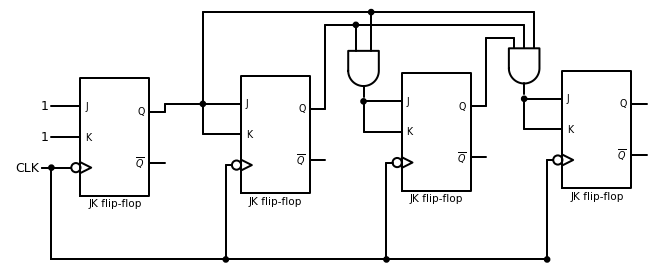

In [14]:
def jk(invert_clk=False):
    return (
        elm.Ic(
            pins=[
                elm.IcPin(name=">", side="left", invert=invert_clk),
                elm.IcPin(name="K", side="left"),
                elm.IcPin(name="J", side="left"),
                elm.IcPin(name="$\overline{Q}$", side="right", anchorname="QBAR"),
                elm.IcPin(name="Q", side="right"),
            ],
            pinspacing=1,
        )
        .right()
        .label("JK flip-flop", "bottom", fontsize=12)
    )


with schemdraw.Drawing() as d:
    ffs = []
    for i in range(4):
        ffs.append(jk(invert_clk=True))
        d += ffs[-1]
        d.move_from(ffs[-1].QBAR, dx=2.5, dy=-1)
    d += elm.Line().at(ffs[0].J).left(d.unit * 0.15).label("1", "left")
    d += elm.Line().at(ffs[0].K).left(d.unit * 0.15).label("1", "left")

    ps = []
    for ff1, ff2 in zip(ffs, ffs[1:]):
        d += (p := elm.Line().at(ff2.J).left(d.unit * 0.25).dot())
        d += elm.Line().to(ff2.J)
        d += elm.Line().at(p.end).toy(ff2.K)
        d += elm.Line().to(ff2.K)
        ps.append(p)

    d += elm.Line().at(ffs[0].CLK).left(d.unit * 0.25).label("CLK", "left")
    d += elm.Line().right(d.unit * 0.1).dot()
    d += (clk := elm.Line().down())

    for ff in ffs[1:]:
        d += elm.Line().at(clk.end).tox(ff.CLK).dot()
        d += elm.Line().to(ff.CLK)

    ands = []
    for i, p in enumerate(ps[1:], 2):
        d.move_from(p.end, dy=2)
        ands.append(schemdraw.logic.And(inputs=i).down())
        d += ands[-1]

    d += elm.Line().at(ffs[0].Q).toy(ps[0].end)
    d += elm.Line().to(ps[0].end)
    d += elm.Line().at(ps[0].end).up()

    d += (prev := elm.Line().tox(ands[0].in1).dot())
    d += elm.Line().tox(ands[1].in1)
    d += elm.Line().to(ands[1].in1)

    d += elm.Line().at(prev.end).to(ands[0].in1)

    d += elm.Line().at(ffs[1].Q).toy(ands[0].in2 + 0.5)
    d += (prev := elm.Line().tox(ands[0].in2).dot())
    d += elm.Line().to(ands[0].in2)
    d += elm.Line().at(prev.end).tox(ands[1].in2)
    d += elm.Line().to(ands[1].in2)

    d += elm.Line().at(ffs[2].Q).toy(ands[1].in3)
    d += elm.Line().tox(ands[1].in3)
    d += elm.Line().to(ands[1].in3)

Now, we have the same clock for each flip-flop, but the $JK$ values are governed by the output of the previous flip-flops.
Only when previous flip-flops have their bits set, then we will toggle the current flip-flop.

The total delay of the system is simply $t_{pd}(flipflop) + t_{pd}(AND)$.

Hence, it is no longer dependent on the number of flip-flop in the counter.

However, this is more complex than the ripple counter as we need to introduce AND gates for it counting mechanism.

## Circuit design

Now that we have a grasp on some basic elements of a sequential circuit, we are ready to create one given some specifications.

The steps are as follows:
1. Determine the state and its transitions
2. Map out the next state given the current state and input
3. Obtain the truth table of the circuit based on the flip-flop's excitation table
4. Realize the circuit, after minimization by using [K-map](./logic_gates.ipynb#Karnaugh-Map-(K-Map))

### Example

Suppose that we were task to design a synchronous counter which follows the sequence of:
```
101, 001, 000, 010, 110, 100, 101, ...
```
Also, the counter must have a external $CLR$ input which will set the counter to `000` on the next active clock edge.
Additionally, the bits must be stored in [D flip-flops](#D-flip-flop/latch).

#### 1. Determine state and transitions

The state is simply the counter value, of which there are 6.
The transition is as per the sequence, and it also includes a transition from any state the `000` when $CLR$ is 1.

We assign the flip-flops A, B, C as the bits of the counter, from least significant to most.

#### 2. Map out next states

The following table documents the transitions:

| CLR | C | B | A | C+ | B+ | A+ |
| :---: | :---:  | :---:  | :---:  | :---:  | :---:  | :---: |
| 0 | 0 | 0 | 0 | 0 | 1 | 0 |
| 0 | 0 | 0 | 1 | 0 | 0 | 0 |
| 0 | 0 | 1 | 0 | 1 | 1 | 0 |
| 0 | 0 | 1 | 1 | X | X | X |
| 0 | 1 | 0 | 0 | 1 | 0 | 1 |
| 0 | 1 | 0 | 1 | 0 | 0 | 1 |
| 0 | 1 | 1 | 0 | 1 | 0 | 0 |
| 0 | 1 | 1 | 1 | X | X | X |
| 1 | X | 0 | 0 | 0 | 0 | 0 |

#### 3.Obtain truth table base on flip-flop's behaviour

Since we are using D flip-flops, the required inputs ($D_{A}, D_{B}, D_{C})$ to the flip-flops is the same as $A+, B+, C+$.

| CLR | C | B | A | $$D_{C}$$ |$$D_{B}$$ | $$D_{A}$$ |
| :---: | :---:  | :---:  | :---:  | :---:  | :---:  | :---: |
| 0 | 0 | 0 | 0 | 0 | 1 | 0 |
| 0 | 0 | 0 | 1 | 0 | 0 | 0 |
| 0 | 0 | 1 | 0 | 1 | 1 | 0 |
| 0 | 0 | 1 | 1 | X | X | X |
| 0 | 1 | 0 | 0 | 1 | 0 | 1 |
| 0 | 1 | 0 | 1 | 0 | 0 | 1 |
| 0 | 1 | 1 | 0 | 1 | 0 | 0 |
| 0 | 1 | 1 | 1 | X | X | X |
| 1 | X | 0 | 0 | 0 | 0 | 0 |

If we were using SR flip-flops, then we need to determine the SR inputs to pass to each flip-flop.

#### 4. Use K-map

The K-map for $D_A$ is below (we used $K$ to represent $CLR$):

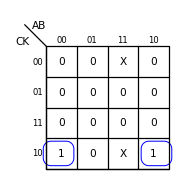

In [15]:
truthtable = [
    ("1100", "X"),
    ("0010", "1"),
    ("1010", "1"),
    ("1110", "X"),
]
Kmap("ABCK", truthtable=truthtable, groups={".010": {"color": "blue"}})

Hence, we get $D_A = \overline{B} C \cdot \overline{CLR}$.

The K-map for $D_B$ is below:

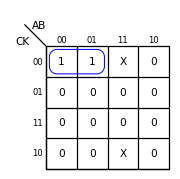

In [16]:
truthtable = [
    ("1100", "X"),
    ("1110", "X"),
    ("0000", "1"),
    ("0100", "1"),
]
Kmap("ABCK", truthtable=truthtable, groups={"0.00": {"color": "blue"}})

Hence, we get $D_B = \overline{A} \cdot \overline C \cdot \overline{CLR}$.

Lastly, the K-map for $D_C$ is below:

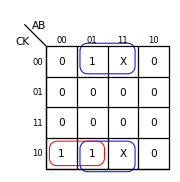

In [17]:
truthtable = [
    ("1100", "X"),
    ("1110", "X"),
    ("0100", "1"),
    ("0010", "1"),
    ("0110", "1"),
]
Kmap(
    "ABCK",
    truthtable=truthtable,
    groups={".1.0": {"color": "blue"}, "0.10": {"color": "red"}},
)

Hence, we get $D_C = B \cdot \overline{CLR} + \overline A C \cdot \overline{CLR}$.

Lastly, we just wire up our flip-flops using the logic above.